# Online Shopper Data Preparation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

This is a preprocessed dataset. Some of the variables are dropped. All variables are converted to numeric. Revenue is the target variable. It is a factorial varible converted to numeric. This is a classification problem.






In [ ]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 50) # ...
pd.set_option('display.max_columns', 100) # This instruction is for...
pd.set_option('display.width', 1000)



In [ ]:
train_full = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data/online shop_train.csv')

In [ ]:
test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data/online shop_test.csv')

In [ ]:
train_full.shape

(16626, 13)

In [ ]:
test.shape

(2466, 13)

In [ ]:
train_full.head()

,Administrative,Informational,ProductRelated,ExitRates,PageValues,SpecialDay,Month,Region,TrafficType,VisitorType0,VisitorType1,Weekend,Revenue
0,0,0,12,0.069444,0.000000,0.8,5,2,2,0.0,1.0,0,0
1,0,0,44,0.032143,0.000000,0.0,12,1,1,0.0,1.0,0,0
2,2,0,7,0.011111,0.000000,0.0,3,8,2,0.0,0.0,0,0
3,3,0,37,0.004274,47.931282,0.0,5,3,2,0.0,0.0,1,1
4,0,0,1,0.200000,0.000000,0.0,5,3,3,0.0,1.0,1,0


In [ ]:
train_full.describe()

,Administrative,Informational,ProductRelated,ExitRates,PageValues,SpecialDay,Month,Region,TrafficType,VisitorType0,VisitorType1,Weekend,Revenue
count,16626.000000,16626.000000,16626.000000,16626.000000,16626.000000,16626.000000,16626.000000,16626.000000,16626.000000,16626.000000,16626.00000,16626.000000,16626.000000
mean,2.297907,0.457296,37.823950,0.033312,14.074354,0.038374,8.129737,2.838807,3.556358,0.004451,0.82359,0.238181,0.500000
std,3.168297,1.160715,50.922376,0.040125,27.136885,0.159034,3.354549,2.277844,3.514761,0.066568,0.38118,0.425983,0.500015
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,10.000000,0.012372,0.000000,0.000000,5.000000,1.000000,2.000000,0.000000,1.00000,0.000000,0.000000
50%,1.000000,0.000000,21.000000,0.020534,0.000000,0.000000,10.000000,2.000000,2.000000,0.000000,1.00000,0.000000,0.500000
75%,4.000000,0.000000,44.000000,0.035150,17.857937,0.000000,11.000000,4.000000,4.000000,0.000000,1.00000,0.000000,1.000000
max,27.000000,24.000000,705.000000,0.200000,361.763742,1.000000,12.000000,9.000000,20.000000,1.000000,1.00000,1.000000,1.000000


In [ ]:
train_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16626 entries, 0 to 16625
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Administrative  16626 non-null  int64  
 1   Informational   16626 non-null  int64  
 2   ProductRelated  16626 non-null  int64  
 3   ExitRates       16626 non-null  float64
 4   PageValues      16626 non-null  float64
 5   SpecialDay      16626 non-null  float64
 6   Month           16626 non-null  int64  
 7   Region          16626 non-null  int64  
 8   TrafficType     16626 non-null  int64  
 9   VisitorType0    16626 non-null  float64
 10  VisitorType1    16626 non-null  float64
 11  Weekend         16626 non-null  int64  
 12  Revenue         16626 non-null  int64  
dtypes: float64(5), int64(8)
memory usage: 1.6 MB


In [ ]:
train_full.VisitorType0 = train_full.VisitorType0.astype(int)
train_full.VisitorType1 = train_full.VisitorType0.astype(int)

In [ ]:
train_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16626 entries, 0 to 16625
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Administrative  16626 non-null  int64  
 1   Informational   16626 non-null  int64  
 2   ProductRelated  16626 non-null  int64  
 3   ExitRates       16626 non-null  float64
 4   PageValues      16626 non-null  float64
 5   SpecialDay      16626 non-null  float64
 6   Month           16626 non-null  int64  
 7   Region          16626 non-null  int64  
 8   TrafficType     16626 non-null  int64  
 9   VisitorType0    16626 non-null  int64  
 10  VisitorType1    16626 non-null  int64  
 11  Weekend         16626 non-null  int64  
 12  Revenue         16626 non-null  int64  
dtypes: float64(3), int64(10)
memory usage: 1.6 MB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


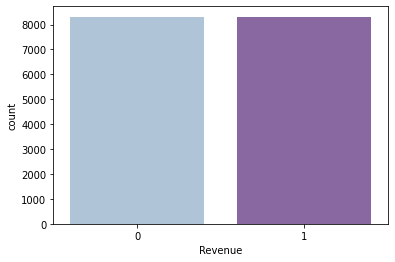

In [ ]:
import seaborn as sns
sns.countplot(train_full['Revenue'], palette='BuPu')

This is a balanced dataset

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.figure(figsize = (20,20))
g = sns.heatmap(train_full.corr(),annot=True, cmap = 'BuPu')

Comment: Revenue has maximum correlation with PageValues


In [ ]:
X_train_full = train_full.iloc[:,:-1]
y_train_full = train_full.iloc[:,-1]

In [ ]:
X_train_full.shape

(16626, 12)

In [ ]:
X_test = test.iloc[:,:-1]
y_test = test.iloc[:,-1]

In [ ]:
X_train_full.head()

,Administrative,Informational,ProductRelated,ExitRates,PageValues,SpecialDay,Month,Region,TrafficType,VisitorType0,VisitorType1,Weekend
0,0,0,12,0.069444,0.000000,0.8,5,2,2,0,0,0
1,0,0,44,0.032143,0.000000,0.0,12,1,1,0,0,0
2,2,0,7,0.011111,0.000000,0.0,3,8,2,0,0,0
3,3,0,37,0.004274,47.931282,0.0,5,3,2,0,0,1
4,0,0,1,0.200000,0.000000,0.0,5,3,3,0,0,1


In [ ]:
y_train_full.head()

0    0
1    0
2    0
3    1
4    0
Name: Revenue, dtype: int64

In [ ]:
y_train_full.shape

(16626,)

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.6.0'

In [ ]:
import keras

In [ ]:
keras.__version__

'2.6.0'

## One Hot Encode Target Variable For Classification

#### This is necessary if we have multiclass target variable . (with classes more than 2)
However, if there are only 2 classes, it is not necessary to convert teh target variable to categorical. In such a case use binarycross entropy while compiling.

In [ ]:
y_tra_full = tf.keras.utils.to_categorical(y_train_full, num_classes=None, dtype="int")

In [ ]:
y_tra_full.shape

(16626, 2)

In [ ]:
y_tra_full[0:5]

In [ ]:
y_tes =  tf.keras.utils.to_categorical(y_test, num_classes=None, dtype="int")

In [ ]:
y_tes

### Create a baseline model 

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model

In [ ]:
def create_baseline():
    #Initializing Neural Network
    classifier = Sequential()

    ##Defining the architecture of ANN
   
    # First layer 
    classifier.add(Dense(units = 512, kernel_initializer = 'he_uniform', activation = 'relu', input_dim = 12))
    
    
    # Second layer
    classifier.add(Dense(units= 128 , kernel_initializer = 'he_uniform', activation = 'relu'))
    
    classifier.add(Dense(units= 96, kernel_initializer = 'he_uniform', activation = 'relu'))
    # Adding the output layer
    classifier.add(Dense(units = 2, kernel_initializer = 'he_uniform', activation = 'softmax'))
    
   
    # Compiling Neural Network
    ## specifying optimizer 
    ## This is the metaparameter, specfiying the metaparameter , (adam is popular optimizer like SGD, and GD, 
    ## the binary_corssentropy is because it has 2 class)
    
    return classifier



In [ ]:
model = create_baseline()
print(model.summary())
#plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               6656      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_2 (Dense)              (None, 96)                12384     
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 194       
Total params: 84,898
Trainable params: 84,898
Non-trainable params: 0
_________________________________________________________________
None


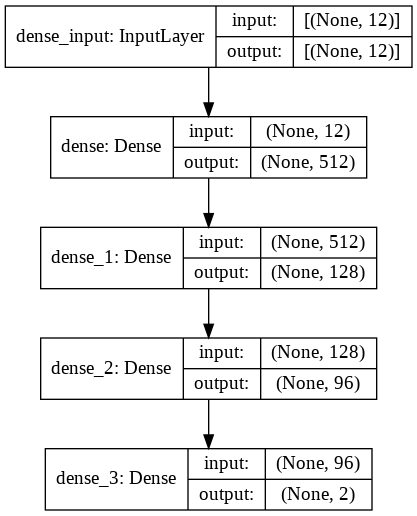

In [ ]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Note: The following model fit uses internal validation split of 20%. In this the last 20% of the rows are used for validation

In [ ]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
# model.fit(X_train_full,y_tra_full, validation_split=0.2, epochs=50)

In [ ]:
history = model.fit(X_train_full, y_tra_full, validation_split=0.2, epochs = 50,  batch_size = 32, verbose = 2)
         

Epoch 1/50
416/416 - 2s - loss: 0.7862 - accuracy: 0.8047 - val_loss: 0.5064 - val_accuracy: 0.7703
Epoch 2/50
416/416 - 1s - loss: 0.4516 - accuracy: 0.8328 - val_loss: 0.2900 - val_accuracy: 0.8752
Epoch 3/50
416/416 - 1s - loss: 0.4124 - accuracy: 0.8408 - val_loss: 0.8089 - val_accuracy: 0.6473
Epoch 4/50
416/416 - 1s - loss: 0.3916 - accuracy: 0.8432 - val_loss: 0.3418 - val_accuracy: 0.8572
Epoch 5/50
416/416 - 1s - loss: 0.3669 - accuracy: 0.8513 - val_loss: 0.3343 - val_accuracy: 0.8614
Epoch 6/50
416/416 - 1s - loss: 0.3646 - accuracy: 0.8515 - val_loss: 0.3212 - val_accuracy: 0.8897
Epoch 7/50
416/416 - 1s - loss: 0.3564 - accuracy: 0.8550 - val_loss: 0.5687 - val_accuracy: 0.7291
Epoch 8/50
416/416 - 1s - loss: 0.3541 - accuracy: 0.8538 - val_loss: 0.4346 - val_accuracy: 0.8467
Epoch 9/50
416/416 - 1s - loss: 0.3448 - accuracy: 0.8570 - val_loss: 0.3017 - val_accuracy: 0.9038
Epoch 10/50
416/416 - 1s - loss: 0.3556 - accuracy: 0.8538 - val_loss: 0.4836 - val_accuracy: 0.8391

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt

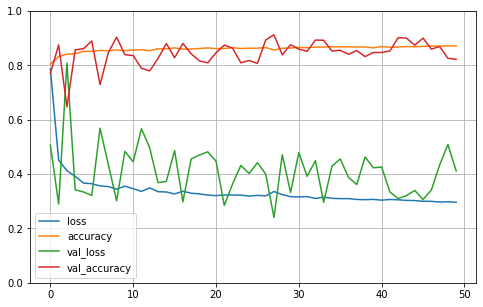

In [ ]:

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

 ## Task


Experiment with other architectures by increasing or decreasing layers, changing the number of neourons in each layer, batch size etc,
Comment on fitness, Summarise and critically analyse results.


Refer to this on validation split: https://datascience.stackexchange.com/questions/38955/how-does-the-validation-split-parameter-of-keras-fit-function-work
